# Clustering

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Mathematical operations and data manipulation
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Modelling
from sklearn.cluster import KMeans

# Warnings
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [3]:
# load data
dataset = pd.read_csv(f"{data_path}/online_shoppers_intention.csv")
dataset.head().T

0                  1  \
Administrative                           0                  0   
Administrative_Duration                0.0                0.0   
Informational                            0                  0   
Informational_Duration                 0.0                0.0   
ProductRelated                           1                  2   
ProductRelated_Duration                0.0               64.0   
BounceRates                            0.2                0.0   
ExitRates                              0.2                0.1   
PageValues                             0.0                0.0   
SpecialDay                             0.0                0.0   
Month                                  Feb                Feb   
OperatingSystems                         1                  2   
Browser                                  1                  2   
Region                                   1                  1   
TrafficType                              1                  2   
VisitorType              Returning_Visitor  Returning_Visitor   
Weekend                              False              False   
Revenue                              False              False   

                                         2                  3  \
Administrative                           0                  0   
Administrative_Duration                0.0                0.0   
Informational                            0                  0   
Informational_Duration                 0.0                0.0   
ProductRelated                           1                  2   
ProductRelated_Duration                0.0           2.666667   
BounceRates                            0.2               0.05   
ExitRates                              0.2               0.14   
PageValues                             0.0                0.0   
SpecialDay                             0.0                0.0   
Month                                  Feb                Feb   
OperatingSystems                         4                  3   
Browser                                  1                  2   
Region                                   9                  2   
TrafficType                              3                  4   
VisitorType              Returning_Visitor  Returning_Visitor   
Weekend                              False              False   
Revenue                              False              False   

                                         4  
Administrative                           0  
Administrative_Duration                0.0  
Informational                            0  
Informational_Duration                 0.0  
ProductRelated                          10  
ProductRelated_Duration              627.5  
BounceRates                           0.02  
ExitRates                             0.05  
PageValues                             0.0  
SpecialDay                             0.0  
Month                                  Feb  
OperatingSystems                         3  
Browser                                  3  
Region                                   1  
TrafficType                              4  
VisitorType              Returning_Visitor  
Weekend                               True  
Revenue                              False

<a id="exploring-data"></a>
## Exploring dataset

In [4]:
# Printing dimensionality of the data, columns, types and missing values
print(f"Data dimension: {dataset.shape}")
for col in dataset.columns:
    print(
        f"Column: {col:35} | "
        f"type: {str(dataset[col].dtype):7} | "
        f"missing values: {dataset[col].isna().sum():3d}"
    )

Data dimension: (12330, 18)
Column: Administrative                      | type: int64   | missing values:   0
Column: Administrative_Duration             | type: float64 | missing values:   0
Column: Informational                       | type: int64   | missing values:   0
Column: Informational_Duration              | type: float64 | missing values:   0
Column: ProductRelated                      | type: int64   | missing values:   0
Column: ProductRelated_Duration             | type: float64 | missing values:   0
Column: BounceRates                         | type: float64 | missing values:   0
Column: ExitRates                           | type: float64 | missing values:   0
Column: PageValues                          | type: float64 | missing values:   0
Column: SpecialDay                          | type: float64 | missing values:   0
Column: Month                               | type: object  | missing values:   0
Column: OperatingSystems                    | type: int64   | missing 

In [5]:
# Computing statistics on numerical features
dataset.describe().T

count         mean          std  min         25%  \
Administrative           12330.0     2.315166     3.321784  0.0    0.000000   
Administrative_Duration  12330.0    80.818611   176.779107  0.0    0.000000   
Informational            12330.0     0.503569     1.270156  0.0    0.000000   
Informational_Duration   12330.0    34.472398   140.749294  0.0    0.000000   
ProductRelated           12330.0    31.731468    44.475503  0.0    7.000000   
ProductRelated_Duration  12330.0  1194.746220  1913.669288  0.0  184.137500   
BounceRates              12330.0     0.022191     0.048488  0.0    0.000000   
ExitRates                12330.0     0.043073     0.048597  0.0    0.014286   
PageValues               12330.0     5.889258    18.568437  0.0    0.000000   
SpecialDay               12330.0     0.061427     0.198917  0.0    0.000000   
OperatingSystems         12330.0     2.124006     0.911325  1.0    2.000000   
Browser                  12330.0     2.357097     1.717277  1.0    2.000000   
Region                   12330.0     3.147364     2.401591  1.0    1.000000   
TrafficType              12330.0     4.069586     4.025169  1.0    2.000000   

                                50%          75%           max  
Administrative             1.000000     4.000000     27.000000  
Administrative_Duration    7.500000    93.256250   3398.750000  
Informational              0.000000     0.000000     24.000000  
Informational_Duration     0.000000     0.000000   2549.375000  
ProductRelated            18.000000    38.000000    705.000000  
ProductRelated_Duration  598.936905  1464.157214  63973.522230  
BounceRates                0.003112     0.016813      0.200000  
ExitRates                  0.025156     0.050000      0.200000  
PageValues                 0.000000     0.000000    361.763742  
SpecialDay                 0.000000     0.000000      1.000000  
OperatingSystems           2.000000     3.000000      8.000000  
Browser                    2.000000     2.000000     13.000000  
Region                     3.000000     4.000000      9.000000  
TrafficType                2.000000     4.000000     20.000000

<a id="clustering"></a>
## Clustering

### K-means Clustering for Informational Duration versus Bounce Rate

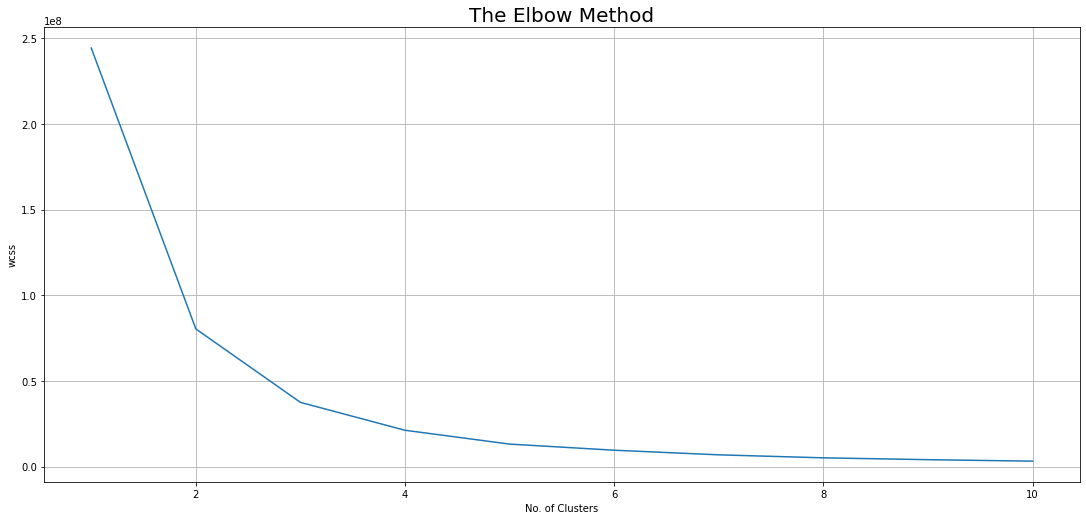

In [6]:
x = dataset.iloc[:, [3, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        init="k-means++",
        max_iter=300,
        n_init=10,
        random_state=0,
        algorithm="elkan",
        tol=0.001,
    )
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams["figure.figsize"] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title("The Elbow Method", fontsize=20)
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")
plt.show()

k=2 is the optimum value for clustering.

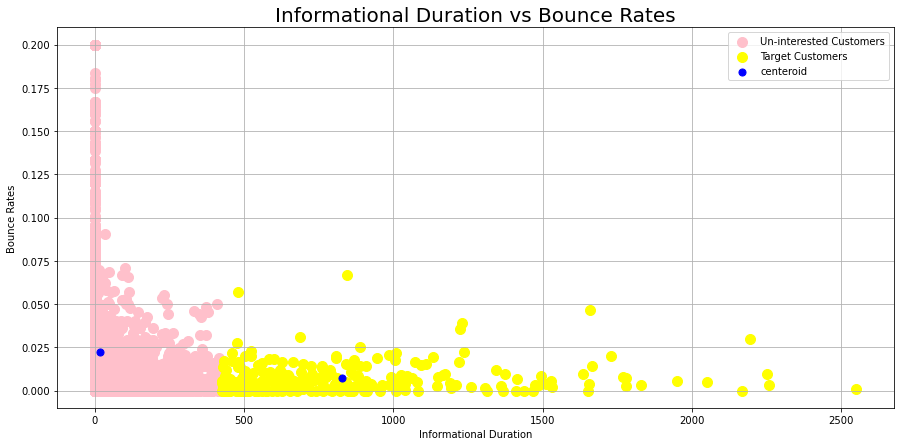

In [7]:
km = KMeans(
    n_clusters=2, init="k-means++", max_iter=300, n_init=10, random_state=0
)
y_means = km.fit_predict(x)

plt.scatter(
    x[y_means == 0, 0],
    x[y_means == 0, 1],
    s=100,
    c="pink",
    label="Un-interested Customers",
)
plt.scatter(
    x[y_means == 1, 0],
    x[y_means == 1, 1],
    s=100,
    c="yellow",
    label="Target Customers",
)
plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=50,
    c="blue",
    label="centeroid",
)

plt.title("Informational Duration vs Bounce Rates", fontsize=20)
plt.grid()
plt.xlabel("Informational Duration")
plt.ylabel("Bounce Rates")
plt.legend()
plt.show()

Target customers spend around 850-900 seconds on average on the Information page.

### K-means Clustering for Informational Duration versus Exit Rate

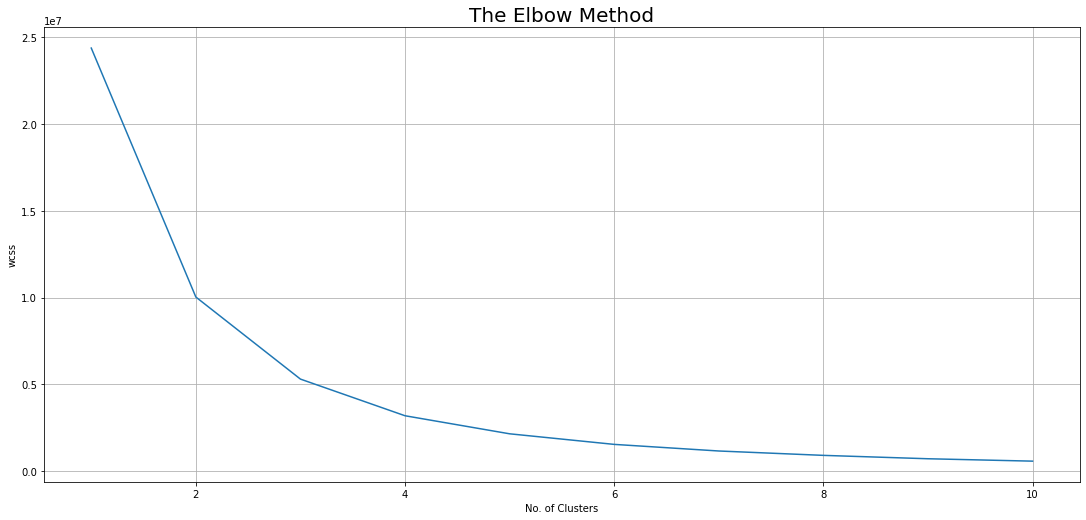

In [8]:
x = dataset.iloc[:, [4, 7]].values

wcss = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        init="k-means++",
        max_iter=300,
        n_init=10,
        random_state=0,
        algorithm="elkan",
        tol=0.001,
    )
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams["figure.figsize"] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title("The Elbow Method", fontsize=20)
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")
plt.show()

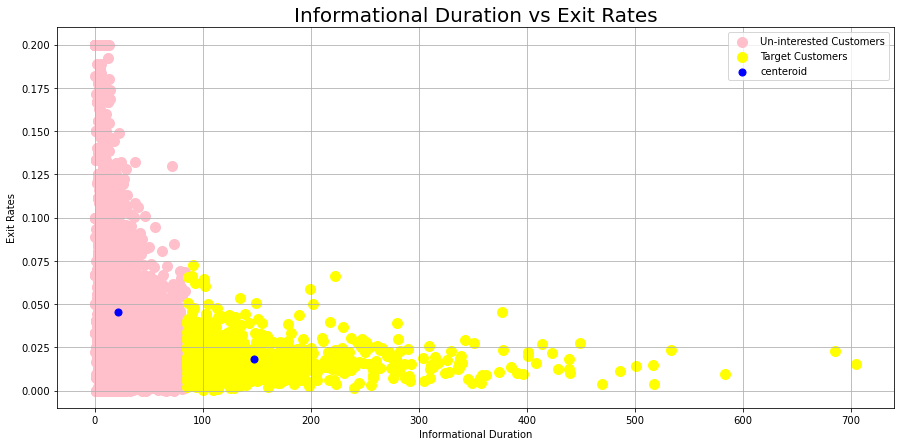

In [9]:
km = KMeans(
    n_clusters=2, init="k-means++", max_iter=300, n_init=10, random_state=0
)
y_means = km.fit_predict(x)

plt.scatter(
    x[y_means == 0, 0],
    x[y_means == 0, 1],
    s=100,
    c="pink",
    label="Un-interested Customers",
)
plt.scatter(
    x[y_means == 1, 0],
    x[y_means == 1, 1],
    s=100,
    c="yellow",
    label="Target Customers",
)
plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=50,
    c="blue",
    label="centeroid",
)

plt.title("Informational Duration vs Exit Rates", fontsize=20)
plt.grid()
plt.xlabel("Informational Duration")
plt.ylabel("Exit Rates")
plt.legend()
plt.show()

### K-means Clustering for Administrative Duration versus Bounce Rate and Administrative Duration versus Exit Rate

In [10]:
# Administrative duration vs Bounce Rate
x = dataset.iloc[:, [1, 6]].values
x.shape

(12330, 2)

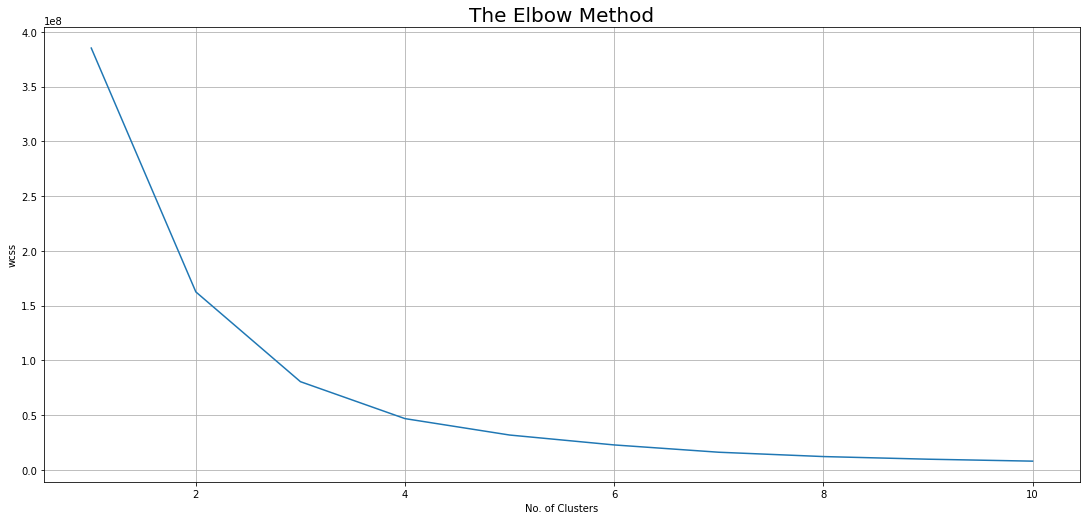

In [11]:
wcss = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        init="k-means++",
        max_iter=300,
        n_init=10,
        random_state=0,
        algorithm="elkan",
        tol=0.001,
    )
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams["figure.figsize"] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title("The Elbow Method", fontsize=20)
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")
plt.show()

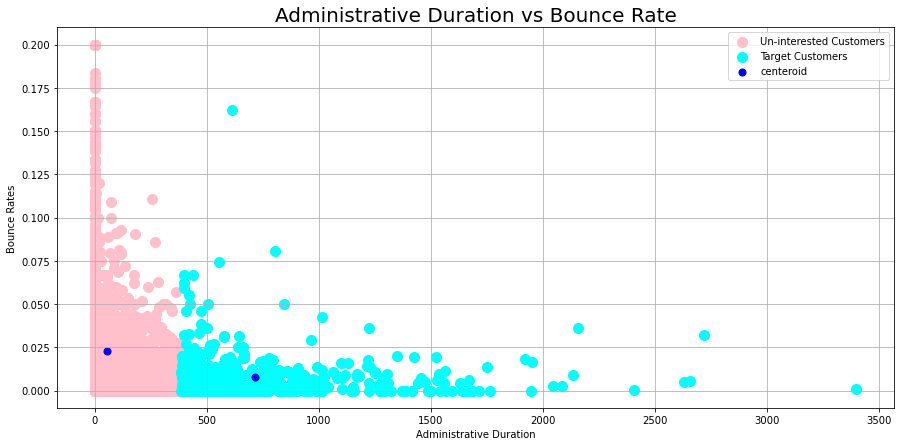

In [12]:
km = KMeans(
    n_clusters=2, init="k-means++", max_iter=300, n_init=10, random_state=0
)
y_means = km.fit_predict(x)

plt.scatter(
    x[y_means == 0, 0],
    x[y_means == 0, 1],
    s=100,
    c="pink",
    label="Un-interested Customers",
)
plt.scatter(
    x[y_means == 1, 0],
    x[y_means == 1, 1],
    s=100,
    c="cyan",
    label="Target Customers",
)
plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=50,
    c="blue",
    label="centeroid",
)

plt.title("Administrative Duration vs Bounce Rate", fontsize=20)
plt.grid()
plt.xlabel("Administrative Duration")
plt.ylabel("Bounce Rates")
plt.legend()
plt.show()

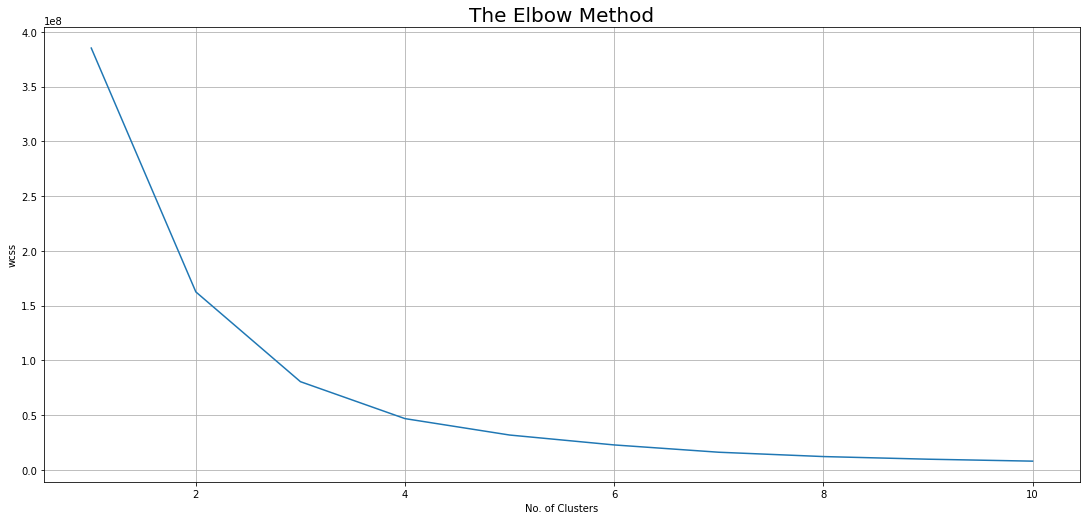

In [13]:
# Administrative duration vs Exit Rate
x = dataset.iloc[:, [1, 7]].values

wcss = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        init="k-means++",
        max_iter=300,
        n_init=10,
        random_state=0,
        algorithm="elkan",
        tol=0.001,
    )
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams["figure.figsize"] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title("The Elbow Method", fontsize=20)
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")
plt.show()

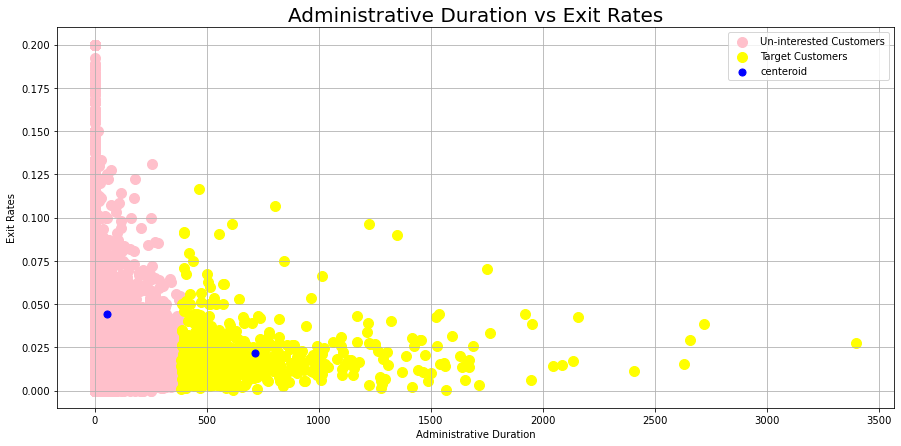

In [14]:
km = KMeans(
    n_clusters=2, init="k-means++", max_iter=300, n_init=10, random_state=0
)
y_means = km.fit_predict(x)

plt.scatter(
    x[y_means == 0, 0],
    x[y_means == 0, 1],
    s=100,
    c="pink",
    label="Un-interested Customers",
)
plt.scatter(
    x[y_means == 1, 0],
    x[y_means == 1, 1],
    s=100,
    c="yellow",
    label="Target Customers",
)
plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=50,
    c="blue",
    label="centeroid",
)

plt.title("Administrative Duration vs Exit Rates", fontsize=20)
plt.grid()
plt.xlabel("Administrative Duration")
plt.ylabel("Exit Rates")
plt.legend()
plt.show()

Uninterested customers spend less time in administrative pages compared with the target customers, who spend around 750 seconds on the administrative page before exiting.

* The conversion rates of new visitors are high compared to those of returning customers.
* While the number of returning customers to the website is high, the conversion rate is low compared to that of new customers.
* Pages with a high page value have a lower bounce rate. We should be talking with our tech team to find ways to improve the page value of the web pages.